# 2D Recurrent Neural Network Position Model

### Load Data

In [4]:
NUM_ITERS = 350000

NUM_CLASSES = 4
NUM_HIDDEN = 30
ROLLOUT = 150
LEARNING_RATE = 0.005
REGULARIZER = 0.001

In [5]:
%store -r shots

df = shots['df']
sideways = df.T

X, Y = np.array(sideways.ix[['dist0', 'theta0']]).astype(float), np.array(sideways.ix['label']).astype(int)

### Data

/home/ebanner/.anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  app.launch_new_instance()
/home/ebanner/.anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


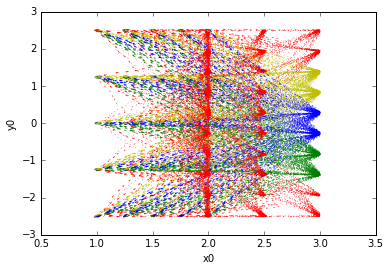

In [7]:
colormap = np.array(['r', 'g', 'b', 'y'])
labels = df['label']
axes = df.plot(kind='scatter', x='x0', y='y0', c=colormap[labels], s=0)
axes.quiver(df['x0'], df['y0'], df['dx0'], df['dy0'], color=colormap[labels], scale_units='xy', angles='xy', scale=2.5, headwidth=2)

### Train

In [ ]:
from rnn.model import RecurrentNeuralNetwork

rnn_db = RecurrentNeuralNetwork(X, Y, H=NUM_HIDDEN, C=NUM_CLASSES, rollout=ROLLOUT, learning_rate=LEARNING_RATE, regularizer=REGULARIZER, gradient_checking=False, inspect=True)

def states(iters):
    for i in range(iters):
        if not i % 1000:
            print('{}%...'.format((i/NUM_ITERS)*100, end=''))
            %store rnn_db
                  
        rnn_db.learn()
        yield rnn_db.info
        
states = list(states(NUM_ITERS))

0.0%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
0.2857142857142857%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
0.5714285714285714%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
0.8571428571428572%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
1.1428571428571428%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
1.4285714285714286%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
1.7142857142857144%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
2.0%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
2.2857142857142856%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
2.571428571428571%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
2.857142857142857%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
3.1428571428571432%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
3.428571428571429%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
3.7142857142857144%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
4.0%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
4.285714285714286%...
Stored 'rnn_db' (RecurrentNeuralNetwork)
4.571428571428571%...
Sto

In [1]:
%store -r rnn_db

### Plot Losses

In [ ]:
def loss_averages():
    for state in states:
        yield state.loss
        
losses = list(loss_averages())

pd.DataFrame(losses, columns=['loss']).plot()

### Visualize

In [ ]:
from ipywidgets import interact, fixed

@interact(X=fixed(X), Y=fixed(Y), view_index=(0, len(states)-1), states=fixed(states))
def plot(X, Y, view_index, states):
    """View decision boundary over time
    
    We have the state of the model (i.e. its parameters) after every time step.
    We want to see how the model learns over time. Hence create a one-off instance
    of a softmax with its old parameters and ask it to make a bunch of predictions!
    """
    s = states[view_index]
    nn = RecurrentNeuralNetwork(X, Y, H=NUM_HIDDEN, C=NUM_CLASSES, Whh=s.Whh, bhh=s.bhh, Wxh=s.Wxh, bxh=s.bxh)
    
    # Plotting
    colormap = np.array(['r', 'b'])

    # Plot the gold standard in a plot right next to it
    axes = df.plot(kind='scatter', x='x0', y='y0', c=colormap[df['label']], title='Ground Truth', s=0)
    axes.quiver(df['x0'], df['y0'], df['dx0'], df['dy0'], color=colormap[df['label']], scale_units='xy', angles='xy', scale=2.5, width=.0022)

    # Predictions
    scores, predictions = rnn.predict(X)
    df['predictions'] = predictions
    axes = df.plot(kind='scatter', x='x0', y='y0', c=colormap[df['predictions']], title='Predictions', s=0)
    axes.quiver(df['x0'], df['y0'], df['dx0'], df['dy0'], color=colormap[df['predictions']], scale_units='xy', angles='xy', scale=2.5, width=.0022)

    # Misclassified examples
    df['correct'] = df['label'] == df['predictions']
    axes = df.plot(kind='scatter', x='x0', y='y0', c=colormap[df['correct']], title='Missclassified', s=0)
    axes.quiver(df['x0'], df['y0'], df['dx0'], df['dy0'], color=colormap[df['correct']], scale_units='xy', angles='xy', scale=2.5, width=.0022)

In [ ]:
df['correct'].sum() / len(df)